## Assignment points :
    1. Load MINST dataset
    2. Subset your data to use only class 0 and class1 for the next steps.
    3. Standardize your dataset
    4. Divide data into training and validation set using 10-fold cross validation method
    5. Implement Logistic Regression with different values for learning rate
    6. Report difference accuracy for the different learning rate

## 1. Load MINST dataset

### Import dependencies

In [5]:
from sklearn.datasets import load_digits
import pandas as pd
import matplotlib.pyplot as plt

### Load Dataset

In [6]:
mnist = load_digits()
df = pd.DataFrame(mnist.data)
df['Target'] = pd.DataFrame(mnist.target)

### Data explore

#### Frame explore

In [7]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,Target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


#### Visualize digits

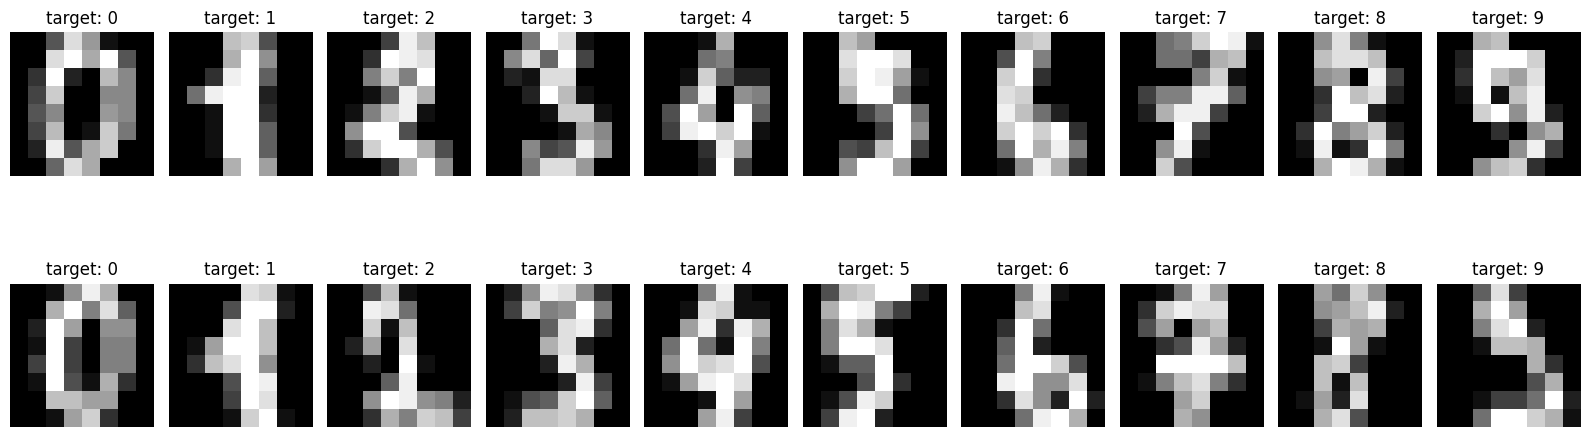

In [8]:
fig, axes = plt.subplots(2, 10, figsize=(16, 6))
for i in range(20):
    axes[i//10, i %10].imshow(mnist.images[i], cmap='gray');
    axes[i//10, i %10].axis('off')
    axes[i//10, i %10].set_title(f"target: {mnist.target[i]}")
    
plt.tight_layout()

## 2. Subset your data to use only class 0 and class1 for the next steps.

In [9]:
df_0_1 = df[(df['Target']==0) | (df['Target']==1)]
df_0_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 360 entries, 0 to 1793
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       360 non-null    float64
 1   1       360 non-null    float64
 2   2       360 non-null    float64
 3   3       360 non-null    float64
 4   4       360 non-null    float64
 5   5       360 non-null    float64
 6   6       360 non-null    float64
 7   7       360 non-null    float64
 8   8       360 non-null    float64
 9   9       360 non-null    float64
 10  10      360 non-null    float64
 11  11      360 non-null    float64
 12  12      360 non-null    float64
 13  13      360 non-null    float64
 14  14      360 non-null    float64
 15  15      360 non-null    float64
 16  16      360 non-null    float64
 17  17      360 non-null    float64
 18  18      360 non-null    float64
 19  19      360 non-null    float64
 20  20      360 non-null    float64
 21  21      360 non-null    float64
 22  22    

## 3. Standardize your dataset

### Import dependencies

In [10]:
import numpy as np

### Standradize function 

In [11]:
def standradize(data):
    mean = np.mean(data)
    std = np.std(data)
    standardized_data = (data - mean) / std
    return standardized_data

## 4. Divide data into training and validation set using 10-fold cross validation method

### Import dependencies

In [12]:
from sklearn.utils import shuffle

#### Shuffle

In [13]:
dataset = shuffle(df_0_1)

#### K-Fold cross validation implementaion

In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [15]:
def accuracy(y, y_hat):
    true=0
    for i in range(len(y)) :
        if y[i] == y_hat[i]:
            true+=1
    return (true / len(y)) * 100

In [16]:
def kFold_cross_validation(X, y, k, eta, epochs):
    n = len(X)
    
    fold_size = n // k
    loss = []
    
    for i in range(k):
        start, end = i * fold_size, (i + 1) * fold_size
        
        X_test, y_test = X[start:end], y[start:end]
        X_train = np.concatenate((X[:start], X[end:]), axis=0)
        y_train = np.concatenate((y[:start], y[end:]), axis=0)
        clf = Logistic(eta, epochs)
        clf.fit(X_train, y_train, eta, epochs)
        
        y_hat = clf.predict(X_test)
        m = len(y_hat)
        w, b = clf.get_weights()
        y_pred_proba = sigmoid(X_test @ w.T + b)
        log_loss = -np.mean(y_test * np.log(y_pred_proba) + (1 - y_test) * np.log(1 - y_pred_proba))
        loss.append(log_loss)
        print("Loss of Group : ", i+1, "is : ",  log_loss, "With eta : ", eta)
        print("Accuracy of Group : ", i+1, "is : ", accuracy(y_test, y_hat.astype(int)))
        print("--------------------------------------------------------------")
       
    return loss
        
    

## 5. Implement Logistic Regression with different values for learning rate

### Import dependencies

In [17]:
import numpy as np

### Implement Logistic Regression

In [18]:
class Logistic:
    def __init__(self, eta=0.0008, epochs=100):
        self.w = None
        self.b = None
        self.eta = None
        self.epochs = None

    def unit_step(self, z):
        for i in range(len(z)):
            if z[i] >0.5:
                z[i] = 1
            else:
                z[i]=0
        return z
    
    def cost(self,y_hat,y):
        m = len(y)
        return -np.mean(-y * np.log(y_hat) - ((1-y) * np.log(1-y_hat)))
    
    def get_net_input(self, X, y):
        return (np.dot(X, self.w)) + self.b
    
    def update_weight(self, y_pred, y, X):
        return self.w - ((self.eta * np.dot((y_pred - y),X)) / len(X))
    
    def update_bias(self, y_pred, y):
        return self.b - (self.eta * np.mean((y_pred - y)))
    
    def activation(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y, eta, epochs):
        m = len(X)
        self.w = np.random.uniform(low=-0.01, high=0.01, size=X.shape[1])
        self.b = np.random.uniform(low=-0.01, high=0.01, size=1)

        self.eta = eta
        self.epochs = epochs
        for epoch in range(epochs):
            #Get net input
            z = self.get_net_input(X, y)
            
            #apply activation function
            z = self.activation(z)
            
            #Calc error
            y_pred = z.copy()
            error = self.cost(y_pred, y)
            #Update Weight and bias
            self.w = self.update_weight(y_pred, y, X)
            self.b = self.update_bias(y_pred, y)
            
            if error == 0:
                break
                
    def predict(self, X):
        return self.unit_step((np.dot(self.w, X.T)) + self.b)
    
    def get_weights(self):
        return [self.w, self.b]
    

## 6. Report difference accuracy for the different learning rate

In [19]:
X = dataset.drop(columns = ['Target'])
y = dataset['Target']

In [20]:
X = X.to_numpy()
y = y.to_numpy()

In [30]:
loss =kFold_cross_validation(X, y, 10, 0.01, 1000)

Loss of Group :  1 is :  0.00044565707885151534 With eta :  0.01
Accuracy of Group :  1 is :  100.0
--------------------------------------------------------------
Loss of Group :  2 is :  0.004256960592164251 With eta :  0.01
Accuracy of Group :  2 is :  100.0
--------------------------------------------------------------
Loss of Group :  3 is :  7.511877437764607e-05 With eta :  0.01
Accuracy of Group :  3 is :  100.0
--------------------------------------------------------------
Loss of Group :  4 is :  0.0009519922692126432 With eta :  0.01
Accuracy of Group :  4 is :  100.0
--------------------------------------------------------------
Loss of Group :  5 is :  0.00027222051852917304 With eta :  0.01
Accuracy of Group :  5 is :  100.0
--------------------------------------------------------------
Loss of Group :  6 is :  0.0002924756248340489 With eta :  0.01
Accuracy of Group :  6 is :  100.0
--------------------------------------------------------------
Loss of Group :  7 is :  0.

In [31]:
loss =kFold_cross_validation(X, y, 10, 0.001, 1000)

Loss of Group :  1 is :  0.0044730406881254145 With eta :  0.001
Accuracy of Group :  1 is :  100.0
--------------------------------------------------------------
Loss of Group :  2 is :  0.016283733077124423 With eta :  0.001
Accuracy of Group :  2 is :  100.0
--------------------------------------------------------------
Loss of Group :  3 is :  0.0013579377407709299 With eta :  0.001
Accuracy of Group :  3 is :  100.0
--------------------------------------------------------------
Loss of Group :  4 is :  0.00546523281297337 With eta :  0.001
Accuracy of Group :  4 is :  100.0
--------------------------------------------------------------
Loss of Group :  5 is :  0.003163811738111758 With eta :  0.001
Accuracy of Group :  5 is :  100.0
--------------------------------------------------------------
Loss of Group :  6 is :  0.0038859759202240756 With eta :  0.001
Accuracy of Group :  6 is :  100.0
--------------------------------------------------------------
Loss of Group :  7 is :  0

In [32]:
loss =kFold_cross_validation(X, y, 10, 0.0001, 1000)

Loss of Group :  1 is :  0.03754240122021958 With eta :  0.0001
Accuracy of Group :  1 is :  100.0
--------------------------------------------------------------
Loss of Group :  2 is :  0.05985419332722756 With eta :  0.0001
Accuracy of Group :  2 is :  97.22222222222221
--------------------------------------------------------------
Loss of Group :  3 is :  0.02118901290362748 With eta :  0.0001
Accuracy of Group :  3 is :  100.0
--------------------------------------------------------------
Loss of Group :  4 is :  0.038349060426393834 With eta :  0.0001
Accuracy of Group :  4 is :  100.0
--------------------------------------------------------------
Loss of Group :  5 is :  0.030877378866537315 With eta :  0.0001
Accuracy of Group :  5 is :  100.0
--------------------------------------------------------------
Loss of Group :  6 is :  0.033826380763331214 With eta :  0.0001
Accuracy of Group :  6 is :  100.0
--------------------------------------------------------------
Loss of Group

In [33]:
loss =kFold_cross_validation(X, y, 10, 0.002, 1000)

Loss of Group :  1 is :  0.002430379016910697 With eta :  0.002
Accuracy of Group :  1 is :  100.0
--------------------------------------------------------------
Loss of Group :  2 is :  0.010386354775022592 With eta :  0.002
Accuracy of Group :  2 is :  100.0
--------------------------------------------------------------
Loss of Group :  3 is :  0.0005592447431854152 With eta :  0.002
Accuracy of Group :  3 is :  100.0
--------------------------------------------------------------
Loss of Group :  4 is :  0.003160005545298341 With eta :  0.002
Accuracy of Group :  4 is :  100.0
--------------------------------------------------------------
Loss of Group :  5 is :  0.0015912772160447677 With eta :  0.002
Accuracy of Group :  5 is :  100.0
--------------------------------------------------------------
Loss of Group :  6 is :  0.0018833143897669226 With eta :  0.002
Accuracy of Group :  6 is :  100.0
--------------------------------------------------------------
Loss of Group :  7 is :  

In [34]:
loss =kFold_cross_validation(X, y, 10, 0.0008, 1000)

Loss of Group :  1 is :  0.005348466512982595 With eta :  0.0008
Accuracy of Group :  1 is :  100.0
--------------------------------------------------------------
Loss of Group :  2 is :  0.017848100517187934 With eta :  0.0008
Accuracy of Group :  2 is :  100.0
--------------------------------------------------------------
Loss of Group :  3 is :  0.0017571088101966327 With eta :  0.0008
Accuracy of Group :  3 is :  100.0
--------------------------------------------------------------
Loss of Group :  4 is :  0.006794077754227186 With eta :  0.0008
Accuracy of Group :  4 is :  100.0
--------------------------------------------------------------
Loss of Group :  5 is :  0.0040323114661402135 With eta :  0.0008
Accuracy of Group :  5 is :  100.0
--------------------------------------------------------------
Loss of Group :  6 is :  0.004980793906444906 With eta :  0.0008
Accuracy of Group :  6 is :  100.0
--------------------------------------------------------------
Loss of Group :  7 i

In [35]:
loss =kFold_cross_validation(X, y, 10, 0.0002, 1000)

Loss of Group :  1 is :  0.02015855632133111 With eta :  0.0002
Accuracy of Group :  1 is :  100.0
--------------------------------------------------------------
Loss of Group :  2 is :  0.03975564154283552 With eta :  0.0002
Accuracy of Group :  2 is :  100.0
--------------------------------------------------------------
Loss of Group :  3 is :  0.009680686719617347 With eta :  0.0002
Accuracy of Group :  3 is :  100.0
--------------------------------------------------------------
Loss of Group :  4 is :  0.02058477770854485 With eta :  0.0002
Accuracy of Group :  4 is :  100.0
--------------------------------------------------------------
Loss of Group :  5 is :  0.01538874011341559 With eta :  0.0002
Accuracy of Group :  5 is :  100.0
--------------------------------------------------------------
Loss of Group :  6 is :  0.018943914046114438 With eta :  0.0002
Accuracy of Group :  6 is :  100.0
--------------------------------------------------------------
Loss of Group :  7 is :  0

In [36]:
loss =kFold_cross_validation(X, y, 10, 0.003, 1000)

Loss of Group :  1 is :  0.0015115052247818039 With eta :  0.003
Accuracy of Group :  1 is :  100.0
--------------------------------------------------------------
Loss of Group :  2 is :  0.00802887002790505 With eta :  0.003
Accuracy of Group :  2 is :  100.0
--------------------------------------------------------------
Loss of Group :  3 is :  0.0003361771514123013 With eta :  0.003
Accuracy of Group :  3 is :  100.0
--------------------------------------------------------------
Loss of Group :  4 is :  0.002404155577990575 With eta :  0.003
Accuracy of Group :  4 is :  100.0
--------------------------------------------------------------
Loss of Group :  5 is :  0.0010105655413018542 With eta :  0.003
Accuracy of Group :  5 is :  100.0
--------------------------------------------------------------
Loss of Group :  6 is :  0.0012826285522757712 With eta :  0.003
Accuracy of Group :  6 is :  100.0
--------------------------------------------------------------
Loss of Group :  7 is :  